Few dependences

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
import os
#!pip install tensorflow==2.5
import tensorflow
print(tensorflow.__version__)
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Lambda, Flatten, Reshape,Conv2D, Conv2DTranspose
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob
import cv2
tensorflow.compat.v1.disable_eager_execution()
warnings.filterwarnings('ignore')
%matplotlib inline

2.8.2


Loading dataset

In [ ]:
## This cell is for mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## This is for AML database to organize and labeling the data
## From mounted google drive
PATH_OF_DATA= '/content/drive/'
os.listdir('/content/drive/MyDrive/AML-Cytomorphology_LMU')
path_dir='/content/drive/MyDrive/AML-Cytomorphology_LMU'
base_dir = '/temp'
!mkdir '/tmp/train'
!mkdir '/tmp/test'
train_dir = '/tmp/train'
test_dir ='/tmp/test'
path_data = pd.read_csv('/content/drive/MyDrive/AML-Cytomorphology_LMU/followup.csv')
target = path_data.iloc[:,1]
tgt = pd.Series.to_numpy(target)
categories =[]
images = []
for image in tgt:
    images.append('/content/drive/MyDrive'+image)
    if ("MYO_" in image) or ("MOB_" in image) :
        categories.append(1)

    else:
        categories.append(0)
print(images)
df = pd.DataFrame({'image':images, 'label':categories})
print(df['label'])

mkdir: cannot create directory ‘/tmp/train’: File exists
mkdir: cannot create directory ‘/tmp/test’: File exists
['/content/drive/MyDrive/AML-Cytomorphology_LMU/MOB/MOB_0002.tiff', '/content/drive/MyDrive/AML-Cytomorphology_LMU/MOB/MOB_0003.tiff', '/content/drive/MyDrive/AML-Cytomorphology_LMU/MOB/MOB_0004.tiff', '/content/drive/MyDrive/AML-Cytomorphology_LMU/MOB/MOB_0005.tiff', '/content/drive/MyDrive/AML-Cytomorphology_LMU/MOB/MOB_0006.tiff', '/content/drive/MyDrive/AML-Cytomorphology_LMU/MOB/MOB_0007.tiff', '/content/drive/MyDrive/AML-Cytomorphology_LMU/MOB/MOB_0008.tiff', '/content/drive/MyDrive/AML-Cytomorphology_LMU/MOB/MOB_0009.tiff', '/content/drive/MyDrive/AML-Cytomorphology_LMU/MOB/MOB_0010.tiff', '/content/drive/MyDrive/AML-Cytomorphology_LMU/MOB/MOB_0011.tiff', '/content/drive/MyDrive/AML-Cytomorphology_LMU/MOB/MOB_0012.tiff', '/content/drive/MyDrive/AML-Cytomorphology_LMU/MOB/MOB_0013.tiff', '/content/drive/MyDrive/AML-Cytomorphology_LMU/MOB/MOB_0014.tiff', '/content/drive

In [ ]:
dataset = tensorflow.data.Dataset.from_tensor_slices((df['image'], df['label']))

def im_file_to_tensor(file, label):
    def _im_file_to_tensor(file, label):
        path = f"../foo/bar/{file.numpy().decode()}"
        im = tensorflow.image.decode_jpeg(tensorflow.io.read_file(path), channels=3)
        im = tensorflow.cast(image_decoded, tensorflow.float32) / 255.0
        return im, label
    return tensorflow.py_function(_im_file_to_tensor,
                          inp=(file, label),
                          Tout=(tensorflow.float32, tensorflow.uint8))

dataset = dataset.map(im_file_to_tensor)

In [ ]:
from skimage.transform import resize

#path_file = pd.read_csv(PATH_OF_DATA+"My Drive"+'/AML-Cytomorphology_LMU/followup.csv')
path_file = pd.read_csv(PATH_OF_DATA+"My Drive"+'/AML-Cytomorphology_LMU/followup_balanced_multilabel.csv')
path = path_file.iloc[:,1]
path = pd.Series.to_numpy(path)
# For multilabel
label = path_file.iloc[:,2]
label = pd.Series.to_numpy(label)
##data = []
##for i in path:
    ##image = cv2.imread(i)
    ##data.append(image)
##data = np.array(data)
##print('DATA shape......',np.shape(data))

#path=[PATH_OF_DATA+"My Drive"+'/ALL_IDB2/img/*_0.tif', PATH_OF_DATA+"My Drive"+'/ALL_IDB2/img/*_1.tif']
data = []
Resnext_accuracy =[]
Resnext_f1 = []
Resnext_roc = []
for i in path:
    #i= PATH_OF_DATA+"My Drive"+i
    print(i)
    folder = glob.glob(i)
    for j in folder:
        image = cv2.imread(j)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
        image = image[:,:,2].astype('float32')/255
        image = resize(image, (256, 256))
        data.append(image)

data = np.array(data)
print(np.shape(data))

/content/drive/My Drive/AML-Cytomorphology_LMU/MMZ/MMZ_0014.tiff
/content/drive/My Drive/AML-Cytomorphology_LMU/MMZ/MMZ_0002.tiff
/content/drive/My Drive/AML-Cytomorphology_LMU/MMZ/MMZ_0011.tiff
/content/drive/My Drive/AML-Cytomorphology_LMU/MMZ/MMZ_0007.tiff
/content/drive/My Drive/AML-Cytomorphology_LMU/MMZ/MMZ_0015.tiff
/content/drive/My Drive/AML-Cytomorphology_LMU/MMZ/MMZ_0006.tiff
/content/drive/My Drive/AML-Cytomorphology_LMU/MMZ/MMZ_0010.tiff
/content/drive/My Drive/AML-Cytomorphology_LMU/MMZ/MMZ_0004.tiff
/content/drive/My Drive/AML-Cytomorphology_LMU/MMZ/MMZ_0005.tiff
/content/drive/My Drive/AML-Cytomorphology_LMU/MMZ/MMZ_0013.tiff
/content/drive/My Drive/AML-Cytomorphology_LMU/MMZ/MMZ_0003.tiff
/content/drive/My Drive/AML-Cytomorphology_LMU/MMZ/MMZ_0001.tiff
/content/drive/My Drive/AML-Cytomorphology_LMU/MMZ/MMZ_0008.tiff
/content/drive/My Drive/AML-Cytomorphology_LMU/MMZ/MMZ_0012.tiff
/content/drive/My Drive/AML-Cytomorphology_LMU/MOB/MOB_0019.tiff
/content/drive/My Drive/A

In [ ]:
print(len(data))
print(len(df['label']))
image_width = 256
image_height =256
channels = 1
batch_size = 64

# Splitting train and validation data
train1_df, test_df, train1_label, test_label = train_test_split(data,label, test_size=0.1)
train_df, validation_df, train_label, validation_label = train_test_split(train1_df,train1_label, test_size=0.1)
print('initial train dataframe:',np.shape(train1_df))
print('Test dataframe:',np.shape(test_df))
print('Validation dataframe:',np.shape(validation_df))

#train_df = train_df.reset_index(drop=True)
#train_df['label'] = train_df['label'].astype(str)
print(train1_df)
validation_df = validation_df.reset_index(drop=True)
print(validation_df)


333
6587
initial train dataframe: (299, 256, 256)
Test dataframe: (34, 256, 256)
Validation dataframe: (30, 256, 256)
[[[0.5154221  0.51068914 0.5098032  ... 0.47450358 0.47121403 0.47530606]
  [0.5098002  0.50979835 0.50845706 ... 0.47450435 0.4745168  0.48062578]
  [0.50155574 0.50404537 0.5081237  ... 0.47262394 0.47339734 0.47767317]
  ...
  [0.5058843  0.49928442 0.5037671  ... 0.50886196 0.50795776 0.50495106]
  [0.5086844  0.49875513 0.50036126 ... 0.51433253 0.5103311  0.5098008 ]
  [0.50868696 0.49597314 0.498004   ... 0.51764107 0.51547664 0.51182157]]

 [[0.49019608 0.49020794 0.49803373 ... 0.49870265 0.50350976 0.5038673 ]
  [0.49019608 0.4902079  0.4980267  ... 0.50367737 0.5091786  0.5068177 ]
  [0.48860037 0.48994258 0.49209452 ... 0.50820076 0.5098029  0.5069935 ]
  ...
  [0.5019649  0.5052749  0.50980395 ... 0.49019554 0.49178877 0.49064744]
  [0.50587875 0.50918657 0.5137154  ... 0.48602137 0.48566785 0.488468  ]
  [0.50667924 0.5096341  0.51372135 ... 0.4790918  0.4

AttributeError: ignored

Data preparation

Blast data generator

VAE: Encoder

In [ ]:
input_data = tensorflow.keras.layers.Input(shape=(image_width, image_height, channels))
encoder = tensorflow.keras.layers.Conv2D(64, (5,5), activation='relu')(input_data)
print(encoder.get_shape())
#encoder = tensorflow.keras.layers.MaxPooling2D((2,2))(encoder)
#print(encoder.get_shape())
encoder = tensorflow.keras.layers.Conv2D(64, (3,3), activation='relu')(encoder)
print(encoder.get_shape())

encoder = tensorflow.keras.layers.MaxPooling2D((2,2))(encoder)
print(encoder.get_shape())

encoder = tensorflow.keras.layers.Conv2D(32, (3,3), activation='relu')(encoder)
print(encoder.get_shape())

encoder = tensorflow.keras.layers.MaxPooling2D((2,2))(encoder)
print(encoder.get_shape())

encoder = tensorflow.keras.layers.Flatten()(encoder)
print(encoder.get_shape())

encoder = tensorflow.keras.layers.Dense(128)(encoder)
print(encoder.get_shape())


(None, 252, 252, 64)
(None, 250, 250, 64)
(None, 125, 125, 64)
(None, 123, 123, 32)
(None, 61, 61, 32)
(None, 119072)
(None, 128)


Latent Distribution and Sampling


In [ ]:
def sample_latent_features(distribution):
    distribution_mean, distribution_variance = distribution
    batch_size = tensorflow.shape(distribution_variance)[0]
    print('batch_size:',batch_size)
    random = tensorflow.keras.backend.random_normal(shape=(batch_size, tensorflow.shape(distribution_variance)[1]))
    return distribution_mean + tensorflow.exp(0.5 * distribution_variance) * random

In [ ]:
distribution_mean = tensorflow.keras.layers.Dense(128, name='mean')(encoder)
distribution_variance = tensorflow.keras.layers.Dense(128, name='log_variance')(encoder)
latent_encoding = tensorflow.keras.layers.Lambda(sample_latent_features)([distribution_mean, distribution_variance])

batch_size: Tensor("lambda_1/strided_slice:0", shape=(), dtype=int32)


In [ ]:
encoder_model = tensorflow.keras.Model(input_data, latent_encoding)
encoder_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_3 (Conv2D)              (None, 252, 252, 64  1664        ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_4 (Conv2D)              (None, 250, 250, 64  36928       ['conv2d_3[0][0]']               
                                )                                                           

VAE: Decoder

In [ ]:
decoder_input = tensorflow.keras.layers.Input(shape=(128))
print(decoder_input.get_shape())
decoder = tensorflow.keras.layers.Dense(28*28*1)(decoder_input)
print(decoder.get_shape())
decoder = tensorflow.keras.layers.Reshape((28,28, 1))(decoder)
print(decoder.get_shape())
decoder = tensorflow.keras.layers.Conv2DTranspose( 64,(3,3), activation='relu')(decoder)
print(decoder.get_shape())
decoder = tensorflow.keras.layers.UpSampling2D((2,2))(decoder)
print(decoder.get_shape())
decoder = tensorflow.keras.layers.Conv2DTranspose(64, (3,3), activation='relu')(decoder)
decoder = tensorflow.keras.layers.UpSampling2D((2,2))(decoder)
print(decoder.get_shape())
decoder = tensorflow.keras.layers.Conv2DTranspose(1, (4,4), activation='relu')(decoder)
decoder = tensorflow.keras.layers.UpSampling2D((2,2))(decoder)

decoder_output = tensorflow.keras.layers.Conv2DTranspose(1, (3,3), activation='relu')(decoder)
print(decoder.get_shape())

(None, 128)
(None, 784)
(None, 28, 28, 1)
(None, 30, 30, 64)
(None, 60, 60, 64)
(None, 124, 124, 64)
(None, 254, 254, 1)


In [ ]:
decoder_model = tensorflow.keras.Model(decoder_input, decoder_output)
decoder_model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 128)]             0         
                                                                 
 dense_3 (Dense)             (None, 784)               101136    
                                                                 
 reshape_1 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 conv2d_transpose_4 (Conv2DT  (None, 30, 30, 64)       640       
 ranspose)                                                       
                                                                 
 up_sampling2d_3 (UpSampling  (None, 60, 60, 64)       0         
 2D)                                                             
                                                                 
 conv2d_transpose_5 (Conv2DT  (None, 62, 62, 64)       3692

Complete VAE: combining

In [ ]:
encoded = encoder_model(input_data)
decoded = decoder_model(encoded)

batch_size: Tensor("model_4/lambda_1/strided_slice:0", shape=(), dtype=int32)


In [ ]:
autoencoder = tensorflow.keras.models.Model(input_data, decoded)

Loss function

In [ ]:
def get_loss(distribution_mean, distribution_variance):

    def get_reconstruction_loss(y_true, y_pred):
        reconstruction_loss = tensorflow.keras.losses.binary_crossentropy(y_true, y_pred)
        reconstruction_loss_batch = tensorflow.reduce_mean(reconstruction_loss)
        return reconstruction_loss_batch*28*28

    def get_kl_loss(distribution_mean, distribution_variance):
        kl_loss = 1 + distribution_variance - tensorflow.square(distribution_mean) - tensorflow.exp(distribution_variance)
        kl_loss_batch = tensorflow.reduce_mean(kl_loss)
        print(tensorflow.shape(kl_loss_batch))
        return kl_loss_batch*(-0.5)

    def total_loss(y_true, y_pred):
        reconstruction_loss_batch = get_reconstruction_loss(y_true, y_pred)
        kl_loss_batch = get_kl_loss(distribution_mean, distribution_variance)
        return reconstruction_loss_batch + kl_loss_batch

    return total_loss

Training

In [ ]:
autoencoder.compile(loss=get_loss(distribution_mean, distribution_variance), optimizer='adam')
autoencoder.summary()

Tensor("loss_1/model_5_loss/Shape:0", shape=(0,), dtype=int32)
Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 1)]     0         
                                                                 
 model_4 (Functional)        (None, 128)               15331424  
                                                                 
 model_5 (Functional)        (None, 256, 256, 1)       139739    
                                                                 
Total params: 15,471,163
Trainable params: 15,471,163
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(label)
print(np.shape(validation_df))
train_df = np.reshape(train_df,(269,256,256,1))
test_df = np.reshape(test_df,(34,256,256,1))
validation_df = np.reshape(validation_df,(30,256,256,1))
#validation_df = np.reshape(data,(593,256,256,1))
autoencoder.fit(train_df, train_df, epochs=30, batch_size=64, validation_data=(validation_df, validation_df))
autoencoder.save('/content/drive/MyDrive/AML-Cytomorphology_LMU/vae_model.h5',custom_objects={'get_loss':get_loss})

['MMZ' 'MMZ' 'MMZ' 'MMZ' 'MMZ' 'MMZ' 'MMZ' 'MMZ' 'MMZ' 'MMZ' 'MMZ' 'MMZ'
 'MMZ' 'MMZ' 'MOB' 'MOB' 'MOB' 'MOB' 'MOB' 'MOB' 'MOB' 'MOB' 'MOB' 'MOB'
 'MOB' 'MOB' 'MOB' 'MOB' 'MOB' 'MOB' 'MOB' 'MOB' 'MOB' 'MOB' 'MOB' 'MOB'
 'MOB' 'MOB' 'MOB' 'EBO' 'EBO' 'EBO' 'EBO' 'EBO' 'EBO' 'EBO' 'EBO' 'EBO'
 'EBO' 'EBO' 'EBO' 'EBO' 'EBO' 'EBO' 'EBO' 'EBO' 'EBO' 'EBO' 'EBO' 'EBO'
 'EBO' 'EBO' 'EBO' 'EBO' 'MON' 'MON' 'MON' 'MON' 'MON' 'MON' 'MON' 'MON'
 'MON' 'MON' 'MON' 'MON' 'MON' 'MON' 'MON' 'MON' 'MON' 'MON' 'MON' 'MON'
 'MON' 'MON' 'MON' 'MON' 'MON' 'NGS' 'NGS' 'NGS' 'NGS' 'NGS' 'NGS' 'NGS'
 'NGS' 'NGS' 'NGS' 'NGS' 'NGS' 'NGS' 'NGS' 'NGS' 'NGS' 'NGS' 'NGS' 'NGS'
 'NGS' 'NGS' 'NGS' 'NGS' 'NGS' 'NGS' 'LYA' 'LYA' 'LYA' 'LYA' 'LYA' 'LYA'
 'LYA' 'LYA' 'LYA' 'LYA' 'LYA' 'LYT' 'LYT' 'LYT' 'LYT' 'LYT' 'LYT' 'LYT'
 'LYT' 'LYT' 'LYT' 'LYT' 'LYT' 'LYT' 'LYT' 'LYT' 'LYT' 'LYT' 'LYT' 'LYT'
 'LYT' 'LYT' 'LYT' 'LYT' 'LYT' 'LYT' 'MYO' 'MYO' 'MYO' 'MYO' 'MYO' 'MYO'
 'MYO' 'MYO' 'MYO' 'MYO' 'MYO' 'MYO' 'MYO' 'MYO' 'M

TypeError: ignored

Real Test Images


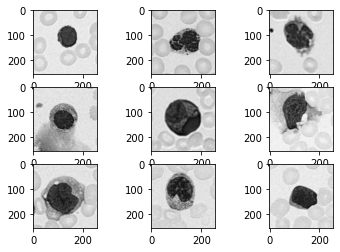

Reconstructed Images with Variational Autoencoder


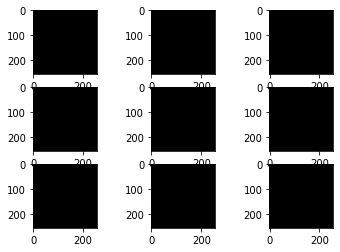

In [ ]:
offset=4
print ("Real Test Images")
# Real Images
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(test_df[i+offset,:,:, -1], cmap='gray')
plt.savefig('/content/drive/MyDrive/AML-Cytomorphology_LMU/real_test.pdf',dpi=3000)
plt.show()

# Reconstructed Images
print ("Reconstructed Images with Variational Autoencoder")
for i in range(9):
    plt.subplot(330 + 1 + i)
    output = autoencoder.predict(np.array([test_df[i+offset]]))
    op_image = np.reshape(output[0]*255, (256, 256))
    plt.imshow(op_image, cmap='gray')

plt.savefig('/content/drive/MyDrive/AML-Cytomorphology_LMU/reconstruction.pdf',dpi=3000)
plt.show()

Latent feature clusters

In [ ]:
x = []
y = []
z = []
print(np.shape(data))
print(df['label'])
data = np.reshape(data,(6587,256,256,1))
for i in range(len(data)):
    z.append(df['label'].iloc[i])
    op = encoder_model.predict(np.array([data[i]]))
    #print(len(op),i)
    x.append(op[0][0:64])
    y.append(op[0][64:128])

#print('Predicted_data:',x)
print('label',np.shape(z))
print('prediction',np.shape(x))
print('prediction',np.shape(y))
xfeature = pd.DataFrame(x)
yfeature = pd.DataFrame(y)
xfeature.to_csv(r'/content/drive/MyDrive/AML-Cytomorphology_LMU/means.csv',header=None, float_format='%.30g')
yfeature.to_csv(r'/content/drive/MyDrive/AML-Cytomorphology_LMU/variances.csv',header=None, float_format='%.30g')

(6587, 256, 256)
0       1
1       1
2       1
3       1
4       1
       ..
6582    0
6583    0
6584    0
6585    0
6586    0
Name: label, Length: 6587, dtype: int64
label (6587,)
prediction (6587, 64)
prediction (6587, 64)


In [ ]:
m = []
v = []
l = []
train1_df = np.reshape(train1_df,(5928,256,256,1))
print(np.shape(train1_df))

for j in range(len(train1_df)):
    l.append(train1_label.iloc[j])
    op = encoder_model.predict(np.array([train1_df[j]]))
    #print(len(op),i)
    m.append(op[0][0:64])
    v.append(op[0][64:128])

for k in range(len(test_df)):
    l.append(test_label.iloc[k])
    op = encoder_model.predict(np.array([test_df[k]]))
    #print(len(op),i)
    m.append(op[0][0:64])
    v.append(op[0][64:128])

mfeature = pd.DataFrame(m)
vfeature = pd.DataFrame(v)
lfeature = pd.DataFrame(l)
mfeature.to_csv(r'/content/drive/MyDrive/AML-Cytomorphology_LMU/means.csv',header=None, float_format='%.30g')
vfeature.to_csv(r'/content/drive/MyDrive/AML-Cytomorphology_LMU/variances.csv',header=None, float_format='%.30g')
lfeature.to_csv(r'/content/drive/MyDrive/AML-Cytomorphology_LMU/labels_vae.csv',header=None, float_format='%.30g')

(5928, 256, 256, 1)


In [ ]:
print(np.shape(y))
df = pd.DataFrame()
z=np.reshape(z,(6587,1))
df['x'] = x
df['y'] = y
#df['z'] = z
#df['z'] = df['z'].cat.categories
print(df)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df,x='x', y='y')
plt.show()


In [ ]:
import sklearn.manifold
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaled_x_data = scaler.fit_transform(x) # This step is needed for standarizing data. For blast classification
scaled_y_data = scaler.fit_transform(y) # This step is needed for standarizing data. For blast classification

#print('scaled size:',scaled_data.shape)
tsne_op = sklearn.manifold.TSNE(n_components=3, perplexity=10)
data_tsne_u = tsne_op.fit_transform(scaled_x_data)
data_tsne_s = tsne_op.fit_transform(scaled_y_data)

In [ ]:
np.savetxt('/content/drive/MyDrive/AML-Cytomorphology_LMU/tsne_s.csv',data_tsne_s)
np.savetxt('/content/drive/MyDrive/AML-Cytomorphology_LMU/tsne_u.csv',data_tsne_u)

Image generation

In [ ]:
!pip install scprep phate umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 93 kB 677 kB/s 
     |████████████████████████████████| 88 kB 4.5 MB/s 
     |████████████████████████████████| 416 kB 7.1 MB/s 
     |████████████████████████████████| 45 kB 3.6 MB/s 
     |████████████████████████████████| 1.8 MB 9.7 MB/s 
     |████████████████████████████████| 1.1 MB 47.9 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=c2d29fcacc67cce166d9af3d6e404f43d6b3d1f98050c813c86b92b1f4516857
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=5cfaa51bd1e925eda30a3888447442bc8f7ce89c177e4d340a754a3a3909cc9d
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f574db3113513696b98f3f9b51f496c
Successfully built umap-learn

In [ ]:
import matplotlib.pyplot as plt
import scprep
ax=scprep.plot.scatter3d(data_tsne_u, figsize=(8,4),  c=np.where(z==0, 'Blast_AML', 'NonBlast'), legend_anchor=(1,1),
                      ticks=False, label_prefix='t-SNE',filename='/content/drive/MyDrive/AML-Cytomorphology_LMU/tsne_vae_media1.pdf')
ax.grid(True)


NameError: ignored

In [ ]:
ax=scprep.plot.scatter3d(data_tsne_s, figsize=(8,4),c=np.where(z==0, 'Blast_AML', 'NonBlast'), legend_anchor=(1,1),
                      ticks=False, label_prefix='t-SNE',filename='/content/drive/MyDrive/AML-Cytomorphology_LMU/tsne_vae_var1.pdf')
ax.grid(True)

In [ ]:
generator_model = decoder_model

In [ ]:
x_values = np.linspace(-3, 3, 30*64)
x_values = np.reshape(x_values,(30,64))
y_values = np.linspace(-3, 3, 30*64)
y_values = np.reshape(y_values,(30,64))
print(np.shape(x_values))

In [ ]:
figure = np.zeros((256 * 30, 256 * 30))
for ix, x in enumerate(x_values):
    for iy, y in enumerate(y_values):
        latent_point = np.append(x, y,axis=0)
        print(np.shape(np.transpose(latent_point)))
        latent_point = np.transpose(latent_point)
        generated_image = generator_model.predict(latent_point)
        figure[ix*28:(ix+1)*28, iy*28:(iy+1)*28,] = generated_image[:,:,-1]

plt.figure(figsize=(15, 15))
plt.imshow(figure, cmap='gray', extent=[3,-3,3,-3])
plt.show()

In [ ]:
from pandas.compat import numpy
data =[]
categories = []
ALL_folder = PATH_OF_DATA+"My Drive"+'/ALL_IDB2/img/'
ALL_images = glob.glob(ALL_folder+'*.tif')
for t in ALL_images:
  if ("1.tif" in t) :
      categories.append(1)

  else:
      categories.append(0)
  image = cv2.imread(t)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
  image = image[:,:,2].astype('float32')/255
  image = resize(image, (256, 256))
  data.append(image)
print(np.shape(data))
data = np.array(data)
data = np.reshape(data,(260,256,256,1))
ALL_encoded = encoder_model.predict(data)
print(ALL_encoded)
print(np.shape(categories))
df = pd.DataFrame(ALL_encoded)
df1 = pd.DataFrame(categories)
df.to_csv(r'/content/drive/MyDrive/AML-Cytomorphology_LMU/ALL_latent.csv',header=None, float_format='%.30g')
df1.to_csv(r'/content/drive/MyDrive/AML-Cytomorphology_LMU/ALL_latent_labels.csv',header=None, float_format='%.30g')


(260, 256, 256)
[[-4.85466510e-01  4.54487026e-01  1.04717922e+00 ...  4.54321057e-01
  -1.63097215e+00 -8.89255822e-01]
 [-2.69303545e-02 -1.56867579e-01  8.86904180e-01 ... -3.01501490e-02
  -1.85046995e+00 -9.16699648e-01]
 [-1.39602736e-01 -1.04803550e+00  9.80029106e-01 ... -5.07909596e-01
  -1.52838886e+00 -6.83308601e-01]
 ...
 [-6.94293559e-01  5.44894695e-01  1.58509922e+00 ... -5.34757227e-02
  -2.03055954e+00 -1.79436719e+00]
 [ 5.64808667e-01 -1.21760368e-03  1.02205062e+00 ...  3.39569777e-01
  -2.30597997e+00  5.30223608e-01]
 [-1.06289756e+00  1.15957364e-01  8.86304855e-01 ...  2.86154151e-02
  -2.06206298e+00  2.41796821e-01]]
(260,)
